<img src="images/header.png">

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Линейные модели (практика)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [2]:
try:
    from ipywidgets import interact, IntSlider, fixed
    from utils import *
except ImportError:
    print u'Так надо'

Так надо


# Постановка задачи

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана **вещественная** зависимая переменная, которая тоже имеет отношение к этим объекам: $y \in \mathbb{R}^n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$
То есть необходимо оценить коэффициенты $\beta_i$.

В случае линейной регрессии коэффициенты $\beta_i$ рассчитываются так, чтобы минимизировать сумму квадратов ошибок по всем наблюдениям:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

## Пример: Стоимость автомобиля

Загрузите [тренировочные данные](http://bit.ly/1gIQs6C) и [тестовые данные](http://bit.ly/IYPHrK) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

In [3]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')
df_test = pd.read_csv('http://bit.ly/IYPHrK')

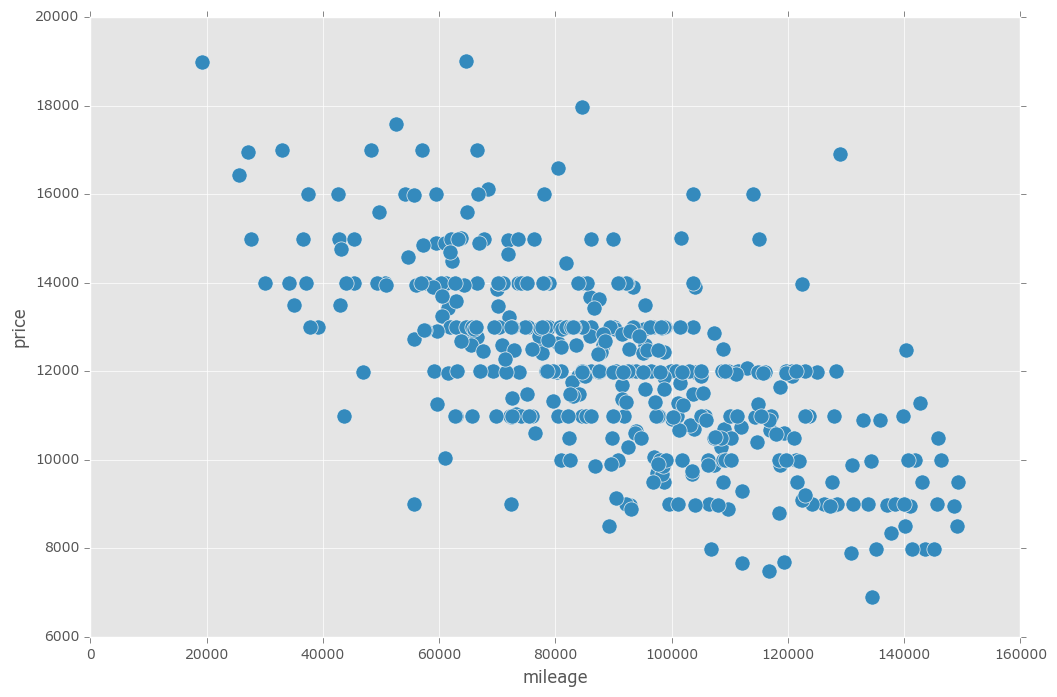

In [5]:
df_train.plot(x='mileage', y='price', kind='scatter', s=120)

Выберем одну переменную mileage в качестве предиктора, а переменную price в качестве зависимой переменной

In [ ]:
y = df.price.values
X = df.mileage.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression

Обучим модель

In [ ]:
## Your code here

In [ ]:
print 'Модель:\nprice = %.2f + (%.2f)*mileage' % (model.intercept_, model.coef_[0])

Нарисуйте предсказание модели вместе с данными на плоскости

In [ ]:
# Your Code Here


### Остатки и меры качества

Давайте взглянем на ошибки (остатки)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

y_hat = model.predict(X)
res = y - y_hat
ax[0].hist(res)
ax[0].set_xlabel('residuals')
ax[0].set_ylabel('counts')

ax[1].scatter(X, res)
ax[1].set_xlabel('mileage')
ax[1].set_ylabel('residuals')


Важно смотреть на остатки.<br/> 
Не должно быть ярких зависимостей между значениями признака и остатками (одно из базовых предположений МНК).<br/>

Посмотрим на меры качества

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Можно посчитать простые варианты агрегирования остатков, например:

* $\frac{1}{n} \sum_i |\hat{y}^{(i)}-y^{(i)}|$ - средняя абсолютная ошибка
* $\frac{1}{n} \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - средняя квадратичная ошибка

In [ ]:
print 'Средняя абсолютная ошибка %.2f' % mean_absolute_error(y, y_hat)
print 'Средняя квадратичная ошибка %.2f' % mean_squared_error(y, y_hat)

Можно рассмотреть более сложную меру: коэффициент детерминации $R^2$:

* $TSS = \sum_i (y^{(i)}-\bar{y})^2$ - общая сумма квадратов (total sum of squares)
* $RSS = \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - сумма квадратов остатков (residual sum of squares)
* $ESS = \sum_i (\hat{y}^{(i)}-\bar{y})^2$ - объясненная сумма квадратов (explained sum of squares)

Для простоты будем считать, что
$$TSS = ESS + RSS$$

Тогда Коэффициент детерминации $R^2=1-\frac{RSS}{TSS}$

Рассчитайте его для нашей модели


In [ ]:
# Your Code Here

## Преобразование переменных

### Нормализация

Переход к близким или единым шкалам улучшает сходимость градиентного спуска, уменьшает риск переполнения разрядности чисел, однако приходится жертвовать прямой интерпретируемостью..

Нормализацию обычно проделывают для вещественных признаков.

Нормализация z-score:
1. Вычитаем среднее: $x - \bar{x}$
2. Делим на стандартное отклонение: $\frac{x - \bar{x}}{std(x)}$

Можно проделать вручную, можно с помошью метода ниже

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

In [ ]:
print 'Модель:\nprice = %.2f + (%.2f)*mileage`' % (model.intercept_, model.coef_[0])

### Природа зависимости

Далеко не всегда переменные зависят друг от друга именно в том виде, в котором они даны. Никто не запрещает зависимость вида
$$\log(y) = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1\frac{1}{x_1}$$
или
$$y = \beta_0 + \beta_1\log(x_1)$$
или
$$y = \beta_0 + \beta_1 x_1^2 + \beta_2 x_2^2 + \beta_3 x_1x_2 $$
и т.д.

Не смотря на то, что могут возникать какие-то нелинейные функции - всё это сводится к **линейной** регрессии (например, о втором пункте, произведите замену $z_1 = \frac{1}{x_1}$)

#### Пример: Вес тела - мозгов

Загрузите [данные](https://www.dropbox.com/s/837utfb6yh4x8xb/weights.csv?dl=0) и информацией о весах мозга и тел различных биологических видов. Вес тела задан в килограммах, вес могза в граммах.

In [ ]:
df = pd.read_csv('weights.csv', sep=';', index_col=0)
df.head()

In [ ]:
df.plot(x = 'body_w', y='brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[:2])
# Должно получится что-то несуразное..

Теперь давайте возьмем логарифм от обеих переменных и сонова нарисуем их на графике

In [ ]:
# Your Code Here


## Как обучать линейную регрессию?
Попробуем разобраться без всяких `.predict()` и `.fit()`

## Градиентный спуск

Градиентый спуск - это итеративный метод оптимизации функции. Он заключается в постепенном перемещении к точке экспетмума в направлении антиградиента этой функции в точке.

Посчитаем, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$

Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$


Теперь к шагам алгоритма:

* Задаем случайное начальное значение для $\beta$
* Пока не будет достигнуто правило останова:
    * Считаем ошибку и значение функции потерь
    * Считаем градиент
    * Обновляем коэффициенты

In [ ]:
def gradient_descent(X, y, iters, alpha):
    n = y.shape[0] 
    Beta = np.random.rand(2)
    for i in xrange(iters):
        y_hat = X.dot(Beta)
        
        # считаем ошибку и значение функции потерь (для дебага)
        #...
        
        # считаем градиент
        #...

        # обновляем коэффициенты
        # ...
    return Beta

In [ ]:
Beta = gradient_descent(X, y, 1000, 0.05)

## Переобучение\недообучение, мультиколлинеарность и регуляризация

Одна из важнейших характеристик моделей, будь то линейная регрессия, наивные Байес и др. - их **обобщающая способность**.
Наша задача не построить "идеальную" модель, на имеющихся у нас наблюдениях, которая идеально их будет предсказывать, но и применять эту модель для новых данных.

Ниже приводятся примеры 3х моделей.

<img src=http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20[8].png>
[Andrew's Ng Machine Learning Class - Stanford]

Второй момент, который важен для линейных моделей - **мультиколлинеарность**. Этот эффект возникает, когда пара предикторов  близка к взаимной линейной зависимости (коэффициент корреляции по модулю близок к 1). Из-за этого:

* Матрица $X^{\top} X$ становится плохо обусловленной или необратимой
* Зависимость $y = \beta_0 + \beta_1x_1 + \beta_2x_2$ перестаёт быть одназначной

С этим эффектом можно бороться несколькими способами

* Последовательно добавлять переменные в модель
* Исключать коррелируемые предикторы

### Регуляризация

В обоих случаях может помочь **регуляризация** - добавление штрафного слагаемого за сложность модели в функцию потерь. В случае линейной регрессии было:
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 $$
Стало (Ridge Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 + \lambda\sum_{j=1}^{m}\beta^2$$
или (Lasso Regularization)
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}[ \sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 + \lambda\sum_{j=1}^{m}|\beta|$$


In [ ]:
# В sklearn эти методы называются так
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

## Робастные модели

### RANSAC регрессия

Квадратичная ошибка достаточно чувствительна к выбросам. Давайте вернемся к нашим данным про автомобили и добавим туда выбросы.

Посмотрим, как поведет себя простая линейная регрессия.

In [ ]:
df_train = pd.read_csv('http://bit.ly/1gIQs6C')

In [ ]:
X_train = df_train.mileage.values.reshape(-1, 1)
y_train = df_train.price.values

n = y_train.shape[0]

In [ ]:
# Добавим выбросы
X_train = np.r_[X_train, [[250000+np.random.rand()*10000]]]
y_train = np.r_[y_train, 16000+np.random.randn()*1000]

In [ ]:
plt.scatter(X_train, y_train)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train[:n], y_train[:n])

model_ouliers = LinearRegression(fit_intercept=True)
model_ouliers.fit(X_train, y_train)

In [ ]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model.predict(x)
y_hat_outliers = model_ouliers.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### RANSAC регрессия

Идея метода RANdom SAmple Consensus (RANSAC) заключается в многократном обучении модели на случайном наборе точек из исходных данных с последующим выбором лучшей модели.

То есть:
* Задаем функцию потерь
* Задаем порог $\theta$ для остатков при котором наблюдения начинают относится к выбросам
* Задаем правило останова

Шаги алгоритма следующие
1. Взять случайные K точек и обучить на них модель M
2. Сравнить ошибки на остальных точких с порогом $\theta$ и отнести к выбросам или внутренним точкам
3. Обучить модель на всех внутренних точках, оценить качество на внутренних точках
4. Повторить 1-3 пока не наступит правило останова. 
5. Вывод: модель с лучшим качеством

In [ ]:
from sklearn.linear_model import RANSACRegressor

In [ ]:
model_ransac = RANSACRegressor(LinearRegression())
model_ransac.fit(X_train, y_train)

In [ ]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_ransac.predict(x)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

### M-estimators

Идея робастных методов заключается во взвешивании остатков модели таким образом, чтобы большие значения вносили меньший вклад в оценку параметров.

Таким образом, вместо минимизации квадрата остатков $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2$$
Будут минимизироваться взвешенные остатки $$ L_w(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}\rho(\hat{y}^{(i)} - y^{(i)}),$$
где $\rho(\cdot)$ - некоторая взвешивающая функция.

Для того, чтобы попробовать эти методы нужно будет устновить пакет `statsmodels` через `pip`

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
c = 4.685
support = np.linspace(-3*c, 3*c, 1000)
tukey = sm.robust.norms.TukeyBiweight(c=c)
plt.plot(support, tukey(support))
plt.ylim(.1, -4.1)

In [ ]:
model_robust = sm.RLM(y_train, sm.add_constant(X_train), M=sm.robust.norms.TukeyBiweight())
model_robust = model_robust.fit()

In [ ]:
model_robust.summary()

In [ ]:
x = np.linspace(0, max(X_train), 100).reshape(-1, 1)
y_hat = model_robust.predict(sm.add_constant(x))

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(X_train, y_train)

ax.plot(x, y_hat, c='red')
ax.plot(x, y_hat_outliers, c='green')

# Логистическая регрессия

### Подготовка к градиентному спуску
#### Производная сигмойды
$$\sigma(z) = \frac{1}{1 + exp{(-z)}}$$
$$ \frac{d }{d z} \sigma(z) = ?$$

#### Градиент логистической функции потерь

Рассмотрите функцию потерь логистической регрессии (в любой из постановок):
$$ L(w) = - \frac{1}{n}\sum_i^n [y^{(i)} = +1]\cdot\log{(h(x^{(i)},w))} + {[y^{(i)} = -1]}\cdot\log{(1-h(x^{(i)},w))} \rightarrow \min_w$$
или 
$$ L(w) = - \frac{1}{n}\sum_i \log(\sigma(y^{(i)} g(x^{(i)})) \rightarrow \min_w$$

Посчитайте $$ \frac{\partial}{\partial w_j} L(w) = ?$$

### Синтетический пример

Сгенерируем выборку и опробуем логистическую регрессию

In [ ]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

Обучите логистическую регрессию на этих данных и нарисуйте разделяющую гиперплоскость

In [ ]:
from sklearn.linear_model import LogisticRegression
# Your Code Here

### Как сделать нелинейную границу?

Рассмотрим набор данных, который в простонародье называют "Бублик".

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
X, y = make_circles(n_samples=100, shuffle=True,
                    noise = 0.1,
                    factor=0.1)

plt.scatter(X[:, 0],
            X[:, 1],
            c=y)

Очевидно, что классы нельзя разделить линией. Но можно сделать это окружностью! </br>
Т.е. разделяющся линия теперь будет задаваться не уравнением прямой $g(x) = w_0 + w_1x_1 + w_2x_2$, а уравнением окружности $c(x) = (x_1 - a)^2 + (x_2 - b)^2 - R^2$. 

Выполните преобразование матрицы X, чтобы в ней были столбцы для $x_1$, $x^2_1$, $x_2$, $x^2_2$ и обучите логистическую регрессию

In [3]:
# Your Code Here

P.S.<br/>
На самом деле можно было сделать еще проще и ввести лишь один дополнительный признак - какой?

## Задача на "реальных" данных

### Предобработка данных

[Данные](https://www.dropbox.com/s/jeijgsga8w55c8w/crx.data?dl=0) по кредитованию.

Столбец с классом называется `y`.<br/> Значение $1$ соответствует классу клиентов банка, которым выдали кредит и они его успешно вернули.<br/> Значение $-1$ соответствует клиентам, невыполнившим свои кредитные обязанности. 

В банке хотят уметь определять по признакам `a1-a15`, сможет ли новый клиент вернуть кредит или нет? То есть нам надо обучить классификатор! *Обычно, в банках используют скор-карты, но процесс их построения тесно связан с логистической регрессией*

Загрузите данные и преобразуйте признаки `a1`, `a9`, `a10` и `a12` из строковых в числовые. В них только 2 возможных значения. Для этого можно использовать функцию DataFrame.replace() в `pandas` или самое обычное присваивание на соответствующих строках.

In [1]:
# Your code here

В признаках `a6`, `a7` присутствуют "редкие" значение. Найдите их с помощью фунцкии `.value_counts()`  и объедините, присвоив им одно и то же значение, например `'Other'`.

In [2]:
# Your code here

Выделите бинарные признаки `a1`, `a9`, `a10` и `a12` в матрицу `X_binary`

Преобразуйте категориальные признаки `a5`, `a6`, `a7`, `a13` с помощью `DictVectorizer`. Вы должны получить матрицу `X_cat`.

Нормализуйте количественные признаки `a2`, `a3`, `a8`, `a11`, `a14` и `a15` с помощью `StandartScaler` или вручную. Вы должны получить матрицу `X_real`.

Матрица `X_cat` будет sparse-матрицой (разреженной). Преобразуте её в полную матрицу с помощью команд `X_cat = X_cat.toarray()` или `X_cat = X_cat.todence()`

Используйте функцию np.concatinate(..) или np.c[..] чтобы сцепить матрицы `X_binary`, `X_cat` и `X_real`

В результате вы должны получить матрицу с преобразованными признаками `X` и вектор ответов `y`

**Проверьте, что признаки линейнонезависимы!**

In [ ]:
# Your code here

### Исследование влияния регуляризации

В случае с логистичесткой регресии, сложность модели выражается в значениях весов $w_j$ при признаках. Больший вес означает большее влияние признака на результат. В таком случае, давайте добавил штрафное слагаемое в функцию оптимизации для логистической регресии. Самый распространенные из них это:

* Ridge regression
$$L(w) = - \frac{1}{n}\left(\sum_i \log(\sigma(y^{(i)} \langle w, x^{(i)} \rangle)) + \frac{1}{C}\sum_j w_j^2\right) \rightarrow \min_w$$

* Lasso regression
$$L(w) = -\frac{1}{n}\left(\sum_i \log(\sigma(y^{(i)} \langle w, x^{(i)} \rangle) + \frac{1}{C}\sum_j |w_j|\right) \rightarrow \min_w$$

$C$ - называется гиперпараметром регуляризации и он задается вручную. Выбирается он с помощью кросс-валидации. Чем больше $С$ - тем меньше влияние регуляризации.


Разделите ваши даннные на обучающую и контрольную выборку в пропорции 70/30 соответственно.



Lasso regression называется так, потому что она осуществляет "отлов" признаков - т.е. незначимые признаки будут иметь нулевые веса в модели, в то время как в Ridge regression - веса будут постепенно падать у всех признаков.

<img src='http://webdancer.is-programmer.com/user_files/webdancer/Image/lasso.png'>

Давайте сравним работу регуляризаторов. 

1. Разбейте данные на обучающую и валидационную выборки в пропорции 70\30.
1. Для $C$ из набора np.logspace(-3, 3, 10) обучите LogisctigRegression c Lasso регуляризацией (`penalty='l1'`). На каждой итерации оцените качество (ROC-AUC) на валидационной выборке и запомните полученные коэффициенты модели
1. На одном графике выведите значение качества в зависимости от параметра `C` 
1. На другом графике для каждого признака выведите значение коэффициента в модели в зависимости от параметра `C`
1. Проделайте тоже самое для Ridge регуляризации (`penalty='l2'`)

In [ ]:
# Your code here